In [1]:
# Importing libraries and Setting Dislplay Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats
from scipy.stats import pearsonr
from random import randint
from time import sleep
import missingno as msno
from IPython.core.display import display, HTML
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

WEB SCRAPING

In [2]:
# Scraping Fifa2020 Player's Detail Characteristics Data from web site

player_list = []

i = 0
while i < 9000:
    url_list = "https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    #print(url_list)
    response = requests.get(url_list)
    #print(response)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    rows = soup.find_all("tr")
    #print(rows)
    for row in rows:
        cells = row.find_all('td')
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        player_list.append(cells_sub)
        result = pd.DataFrame(player_list)
    i += 60

In [3]:
print("Number of All Rows")
print(len(result));
print("")
print("Number of Rows Without Duplicated")
result.drop_duplicates(subset=None, keep="first", inplace=True)
print(len(result))

Number of All Rows
9080

Number of Rows Without Duplicated
8842


In [4]:
#Saving result data frame as a Pickle File
result.to_pickle("PlayerListInitialPickle")

In [5]:
#Reading result from Pickle File as a data frame
result = pd.read_pickle("PlayerListInitialPickle")

In [6]:
# Getting table name (header)
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)
column_name_players

['',
 'Name',
 'Age',
 'OVA',
 'POT',
 'Team & Contract',
 'ID',
 'Height',
 'Weight',
 'foot',
 'BOV',
 'BP',
 'Growth',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [7]:
# Setting columns names
new_column_name_players = [
 'Name',
 'Age',
 'Overall',
 'Potential',
 'Team',
 'Height',
 'Weight',
 'Foot',
 'Best_Overall',
 'Position',
 'Growth',
 'Value',
 'Wage',
 'Release_Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [8]:
result

,0
0,[]
1,"[\n, \n M. BraithwaiteST, 29, 76, 76, \n\n\n\n..."
2,"[\n, \n M. RomeroST, 21, 70, 81, \n\n\n\nPSV\n..."
3,"[\n, \n N. NándezCM CDM RM, 24, 77, 82, \n\n\n..."
4,"[\n, \n J. TangangaRB CB LB, 21, 73, 83, \n\n\..."
...,...
9075,"[\n, \n L. BesozziLW RW, 17, 59, 79, \n\n\n\nC..."
9076,"[\n, \n R. MeißnerST, 20, 60, 69, \n\n\n\nHamb..."
9077,"[\n, \n N. ChadliRM ST, 18, 60, 74, \n\n\n\nNî..."
9078,"[\n, \n ArandaCM RM LM, 19, 61, 75, \n\n\n\nGr..."


DATA CLEANING

In [9]:
#Data Cleaning
result = pd.read_pickle("PlayerListInitialPickle")

result = result[0].str.split(',',expand=True)


result[1] = result[1].str.replace("\n ","")

chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM",
                   "RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()
    
result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()

result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

result_WoLoan = result[result[6].notna()]

result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68,69]],axis=1, inplace=True)

mask_loan = result[6].isnull()

result_loan = result.loc[mask_loan].shift(-1, axis=1)

result_loan.drop_duplicates(subset=[6], keep="first", inplace=True)

result_loan.drop(result_loan.columns[[5,6,66,67,68,69]],axis=1, inplace=True)

result_WoLoan.columns = new_column_name_players

result_loan.columns = new_column_name_players

result_master = pd.concat([result_WoLoan,result_loan]).reset_index()
del result_master["index"]

result_master.drop_duplicates(subset=None, keep="first",inplace=True)

#result_master

/home/axe_rhitta/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
#Cleaning some characters
result_master = result_master[~result_master["Height"].str.contains("~")]
result_master = result_master[~result_master["Age"].str.contains("\n")]
result_master = result_master[result_master["Height"].str.contains("'")]

In [11]:
#Converting Height column to cm
result_master["Height"] = result_master["Height"].str[:-1]

def parse_height(height):
    # format: 5'11"
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

result_master["Height"]=round(result_master["Height"].apply(lambda x:parse_height(x)),0)

In [12]:
#Converting Weight column to kg
result_master["Weight"] = round(result_master["Weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

In [13]:
#Cleaning to Value column and convert to decimal
result_master["Value"] = result_master["Value"].str.replace("€","")
result_master["Value"] = result_master["Value"].str.replace("M","")
result_master.loc[result_master["Value"].str.contains("K"),"Value"]=result_master["Value"].str.split("K").str[0].astype(float)/1000
result_master["Value"] = round(result_master["Value"].astype(float),2)
result_master = result_master.loc[result_master["Value"]>0]

In [14]:
#Cleaning Wage column and convert to decimal
result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master.loc[result_master["Wage"].str.contains("K"),"Wage"]=result_master["Wage"].str.split("K").str[0].astype(float)*1000
result_master["Wage"] = round(result_master["Wage"].astype(float)/1000000,5)

In [15]:
#Cleaning Release_Clause column and convert to decimal
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("€","")
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("M","")
result_master.loc[result_master["Release_Clause"].str.contains("K"),"Release_Clause"]=result_master["Release_Clause"].str.split("K").str[0].astype(float)/1000
result_master["Release_Clause"] = round(result_master["Release_Clause"].astype(float),2)

In [16]:
#Checking Height,Weight,Value,Wage and Release_Clause columns
result_master.head(10)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,M. Braithwaite,29,76,76,FC Barcelona,178.0,73.0,Right,76,ST,0,7.5,0.1250,15.4,362,68,78,67,74,75,368,77,71,75,65,80,386,79,80,80,75,72,380,77,81,76,75,71,321,69,31,78,70,73,76,91,35,30,26,53,14,13,11,7,8,1961,414,2 ★,80,76,71,78,35,74,None
1,M. Romero,21,70,81,PSV,178.0,72.0,Right,72,ST,11,3.6,0.0080,5.8,316,45,72,69,55,75,253,63,41,39,43,67,349,76,79,67,67,60,373,80,84,72,72,65,274,63,29,70,53,59,59,77,25,27,25,69,15,10,16,14,14,1711,366,1 ★,78,72,49,65,31,71,None
2,N. Nández,24,77,82,Cagliari,173.0,70.0,Right,81,CDM,5,16.0,0.0290,28.4,320,65,68,57,80,50,328,75,51,52,72,78,395,75,77,81,81,81,386,74,77,93,77,65,370,87,79,75,74,55,80,229,77,79,73,50,8,8,14,5,15,2078,451,1 ★,76,67,72,77,76,83,None
3,J. Tanganga,21,73,83,Tottenham Hotspur,180.0,73.0,Right,75,CB,10,6.5,0.0370,13.7,264,62,32,66,68,36,274,63,55,37,54,65,347,72,78,64,73,60,302,52,88,66,76,20,287,73,74,41,54,45,62,220,75,75,70,53,11,9,12,7,14,1747,381,1 ★,75,35,60,64,73,74,None
4,J. Grealish,24,83,86,Aston Villa,180.0,68.0,Right,85,CAM,3,49.5,0.0820,97.8,351,81,77,36,85,72,406,88,77,74,82,85,406,79,79,85,79,84,333,75,37,80,61,80,328,60,44,81,85,58,83,140,48,49,43,51,11,6,11,10,13,2015,434,1 ★,79,76,83,86,46,64,None
5,H. Son,27,89,89,Tottenham Hotspur,183.0,78.0,Right,89,LM,0,110.0,0.2100,209.0,404,84,90,68,84,78,403,89,85,70,74,85,431,86,90,86,91,78,391,88,60,89,64,90,349,62,39,91,84,73,89,117,50,34,33,53,11,13,13,6,10,2148,458,3 ★,88,88,82,87,43,70,None
6,P. Sarr,17,62,79,FC Metz,183.0,70.0,Right,64,CAM,17,1.0,0.0005,2.6,273,54,50,55,70,44,284,63,48,43,65,65,321,69,67,61,56,68,287,62,57,62,50,56,288,65,56,60,59,48,59,180,58,62,60,52,14,8,14,8,8,1685,361,1 ★,68,54,61,63,59,56,None
8,E. Haaland,19,87,93,Borussia Dortmund,193.0,88.0,Left,88,ST,6,122.5,0.0720,232.8,373,47,92,69,77,88,351,77,77,62,51,84,404,82,91,75,87,69,426,94,74,80,93,85,361,85,43,88,69,76,83,119,46,43,30,52,7,14,13,11,7,2086,453,2 ★,87,90,65,79,45,87,None
9,Pedri,17,77,91,FC Barcelona,175.0,61.0,Right,81,CAM,14,24.0,0.0150,64.2,312,65,72,50,80,45,353,80,64,51,79,79,413,86,76,87,75,89,322,62,64,74,52,70,325,59,55,77,81,53,82,176,45,71,60,46,12,7,11,8,8,1947,422,1 ★,81,68,75,81,57,60,None
10,M. Depay,26,84,85,Olympique Lyonnais,175.0,78.0,Right,84,CF,1,50.5,0.1050,99.7,387,84,83,65,81,74,413,85,85,83,76,84,404,81,82,79,83,79,398,87,69,78,81,83,346,72,28,85,85,76,79,80,29,31,20,50,8,14,6,12,10,2078,441,3 ★,82,83,82,84,32,78,None


In [17]:
#Deleting some rows that composure columns is blank (Ronaldinho, Juninho, Xavi etc)
result_master = result_master.loc[result_master["Composure"]!=" "]
result_master = result_master[result_master["Base_Stats"]!=' ']

In [18]:
#Cleaning to IR column
result_master["Int_Reputation"]=result_master["Int_Reputation"].str[:-1]

In [19]:
#Checking null values
result_master.isnull().any()

Name                False
Age                 False
Overall             False
Potential           False
Team                False
Height              False
Weight              False
Foot                False
Best_Overall        False
Position            False
Growth              False
Value               False
Wage                False
Release_Clause      False
Attacking           False
Crossing            False
Finishing           False
Heading_Accuracy    False
Short_Passing       False
Volleys             False
Skill               False
Dribbling           False
Curve               False
FK_Accuracy         False
Long_Passing        False
Ball_Control        False
Movement            False
Acceleration        False
Sprint_Speed        False
Agility             False
Reactions           False
Balance             False
Power               False
Shot_Power          False
Jumping             False
Stamina             False
Strength            False
Long_Shots          False
Mentality   

In [20]:
#Checking columns dtypes
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8480 entries, 0 to 8840
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8480 non-null   object 
 1   Age               8480 non-null   object 
 2   Overall           8480 non-null   object 
 3   Potential         8480 non-null   object 
 4   Team              8480 non-null   object 
 5   Height            8480 non-null   float64
 6   Weight            8480 non-null   float64
 7   Foot              8480 non-null   object 
 8   Best_Overall      8480 non-null   object 
 9   Position          8480 non-null   object 
 10  Growth            8480 non-null   object 
 11  Value             8480 non-null   float64
 12  Wage              8480 non-null   float64
 13  Release_Clause    8480 non-null   float64
 14  Attacking         8480 non-null   object 
 15  Crossing          8480 non-null   object 
 16  Finishing         8480 non-null   object 


In [21]:
#Converting to int dtypes
cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']
for col in cols_to_convert:
    result_master[col] = result_master[col].astype("int")

In [22]:
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8480 entries, 0 to 8840
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8480 non-null   object 
 1   Age               8480 non-null   int64  
 2   Overall           8480 non-null   int64  
 3   Potential         8480 non-null   int64  
 4   Team              8480 non-null   object 
 5   Height            8480 non-null   float64
 6   Weight            8480 non-null   float64
 7   Foot              8480 non-null   object 
 8   Best_Overall      8480 non-null   int64  
 9   Position          8480 non-null   object 
 10  Growth            8480 non-null   int64  
 11  Value             8480 non-null   float64
 12  Wage              8480 non-null   float64
 13  Release_Clause    8480 non-null   float64
 14  Attacking         8480 non-null   int64  
 15  Crossing          8480 non-null   int64  
 16  Finishing         8480 non-null   int64  


In [23]:
#Descriptive Statistics of numeric columns
result_master.describe()

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
count,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000
mean,24.959198,70.167217,75.209670,181.402594,75.317807,71.153184,5.042453,5.581018,0.017393,9.759479,275.680778,55.105660,51.550354,56.172995,64.409552,48.442217,286.137146,62.022995,53.768868,47.339623,58.344458,64.661203,335.031014,67.554009,67.688915,67.088561,66.552358,66.147170,316.182547,63.539505,66.639858,66.093160,66.802594,53.107429,278.360495,60.253184,50.088208,56.150708,59.394693,52.473703,64.327476,150.071816,50.373703,51.161321,48.536792,76.128656,15.327358,15.139741,15.000000,15.258255,15.403302,1717.592453,378.807311,1.231840,70.088797,58.325590,62.448467,67.738797,53.114033,67.091627
std,4.816529,6.139481,5.321808,6.876049,7.253180,5.908430,5.577095,10.722531,0.027057,20.654646,71.255460,17.805846,19.430330,17.029848,13.068476,18.107819,75.333999,17.582580,18.369621,17.919471,14.115294,15.133380,52.537367,14.263419,13.954737,13.904967,8.256308,13.965268,46.966723,12.515572,11.933604,14.702075,12.333464,18.995816,62.006841,16.846733,21.344694,19.175859,13.219441,15.606692,10.756368,63.152281,20.506997,21.949989,21.849820,82.015315,17.034390,16.246674,15.870406,16.579964,17.352151,248.466106,37.090918,0.556958,11.195441,13.645461,9.499825,9.060219,17.209766,9.357631
min,15.000000,47.000000,47.000000,155.000000,53.000000,47.000000,0.000000,0.020000,0.000500,0.000000,45.000000,7.000000,3.000000,8.000000,11.000000,4.000000,40.000000,5.000000,7.000000,5.000000,11.000000,9.000000,139.000000,13.000000,15.000000,14.000000,31.000000,17.000000,133.000000,14.000000,26.000000,13.000000,20.000000,4.000000,50.000000,11.000000,4.000000,2.000000,11.000000,7.000000,14.000000,23.000000,4.000000,7.000000,6.000000,10.000000,2.000000,2.000000,1.000000,2.000000,2.000000,770.000000,233.000000,1.000000,26.000000,18.000000,26.000000,29.000000,15.000000,32.000000
25%,21.000000,66.000000,72.000000,175.000000,70.000000,67.000000,0.000000,1.200000,0.003000,1.500000,252.000000,46.000000,38.000000,48.000000,60.000000,35.000000,255.000000,59.000000,42.000000,35.000000,51.000000,62.000000,308.000000,61.000000,61.000000,60.000000,61.000000,59.000000,288.000000,55.000000,59.000000,60.000000,60.000000,42.000000,253.000000,50.000000,29.000000,49.000000,52.000000,43.000000,58.000000,91.000000,32.000000,31.000000,27.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1593.000000,354.000000,1.000000,64.000000,50.000000,56.000000,63.000000,37.000000,61.000000
50%,24.000000,70.000000,75.000000,183.000000,75.000000,71.000000,3.000000,2.200000,0.009000,3.400000,289.000000,60.000000,56.000000,59.000000,67.000000,51.000000,299.000000,67.000000,57.000000,47.000000,61.000000,68.000000,344.000000,69.000000,69.000000,69.000000,67.000000,68.000000,323.000000,65.00000

In [24]:
#Saving Final Player List as Pickle
result_master.to_pickle("PlayerListFinalPickle")

In [25]:
#Reading Final Player List
player_list= pd.read_pickle("PlayerListFinalPickle")

In [26]:
#Assigning the dataset
df=result_master

In [27]:
#Dropping columns not needed
df.drop(['Volleys','Curve','FK_Accuracy', 'FK_Accuracy', 'Long_Passing',
        'Movement', 'Sprint_Speed', 'Agility', 'Growth','Reactions', 'Balance', 'Goalkeeping',
        'GK_Diving','GK_Handling', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Dribbling', 
        'Vision','Standing_Tackle', 'Sliding_Tackle', 'Total_Stats','Base_Stats', 'Mentality', 
        'Heading_Accuracy', 'Penalties', 'Short_Passing','Heading_Accuracy', 
        'Aggression', 'Interceptions', 'Power','Shot_Power','Jumping','Stamina',
        'Strength','Long_Shots', 'Defending', 'Marking', 'Acceleration',],axis=1,inplace=True)

In [28]:
df.head(10)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Skill,Ball_Control,Positioning,Composure,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,M. Braithwaite,29,76,76,FC Barcelona,178.0,73.0,Right,76,ST,7.5,0.1250,15.4,362,68,78,368,80,78,76,2,80,76,71,78,35,74,None
1,M. Romero,21,70,81,PSV,178.0,72.0,Right,72,ST,3.6,0.0080,5.8,316,45,72,253,67,70,59,1,78,72,49,65,31,71,None
2,N. Nández,24,77,82,Cagliari,173.0,70.0,Right,81,CDM,16.0,0.0290,28.4,320,65,68,328,78,75,80,1,76,67,72,77,76,83,None
3,J. Tanganga,21,73,83,Tottenham Hotspur,180.0,73.0,Right,75,CB,6.5,0.0370,13.7,264,62,32,274,65,41,62,1,75,35,60,64,73,74,None
4,J. Grealish,24,83,86,Aston Villa,180.0,68.0,Right,85,CAM,49.5,0.0820,97.8,351,81,77,406,85,81,83,1,79,76,83,86,46,64,None
5,H. Son,27,89,89,Tottenham Hotspur,183.0,78.0,Right,89,LM,110.0,0.2100,209.0,404,84,90,403,85,91,89,3,88,88,82,87,43,70,None
6,P. Sarr,17,62,79,FC Metz,183.0,70.0,Right,64,CAM,1.0,0.0005,2.6,273,54,50,284,65,60,59,1,68,54,61,63,59,56,None
8,E. Haaland,19,87,93,Borussia Dortmund,193.0,88.0,Left,88,ST,122.5,0.0720,232.8,373,47,92,351,84,88,83,2,87,90,65,79,45,87,None
9,Pedri,17,77,91,FC Barcelona,175.0,61.0,Right,81,CAM,24.0,0.0150,64.2,312,65,72,353,79,77,82,1,81,68,75,81,57,60,None
10,M. Depay,26,84,85,Olympique Lyonnais,175.0,78.0,Right,84,CF,50.5,0.1050,99.7,387,84,83,413,84,85,79,3,82,83,82,84,32,78,None


In [29]:
df.sort_values(by='Value').head(20)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Skill,Ball_Control,Positioning,Composure,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Hits
7443,K. Stamatopoulos,40,56,56,AIK,188.0,80.0,Left,56,GK,0.02,0.00060,0.02,88,17,12,76,24,17,44,1,55,52,53,55,33,54,None
6528,M. McNulty,39,60,60,Cork City,190.0,70.0,Right,60,GK,0.02,0.00050,0.04,90,16,12,89,23,12,50,1,60,61,54,57,34,60,None
6835,M. Wright,33,47,47,Crawley Town,178.0,81.0,Left,47,LB,0.02,0.00100,0.04,174,46,26,173,39,26,34,1,48,29,37,39,47,46,None
5341,C. Doyle,35,62,62,Kilmarnock,196.0,92.0,Right,62,GK,0.04,0.00075,0.08,79,15,14,104,32,7,40,1,61,62,62,61,32,61,None
7472,Song Yue,28,47,47,Tianjin TEDA FC,185.0,79.0,Right,49,RM,0.04,0.00200,0.06,215,44,33,215,43,48,35,1,65,37,49,47,41,60,None
7439,20 J. Ibehre,36,58,58,Cambridge United,193.0,92.0,Right,58,ST,0.04,0.00200,0.08,261,47,54,227,56,57,56,1,60,54,49,55,39,75,None
6527,D. Gerken,35,61,61,Colchester United,183.0,77.0,Right,61,GK,0.04,0.00100,0.06,93,13,16,105,22,11,44,1,60,61,58,60,41,61,None
6517,19 J. O'Shea,37,66,66,Reading,190.0,84.0,Right,65,CB,0.04,0.00700,0.17,241,53,29,244,56,32,68,2,29,33,55,51,68,60,None
6035,M. Gilks,38,63,63,Bolton Wanderers,185.0,81.0,Right,63,GK,0.05,0.00200,0.09,88,20,11,91,21,11,48,1,63,62,61,62,35,63,None
6547,20 P. Edwards,33,58,58,Accrington Stanley,173.0,71.0,Right,60,CB,0.06,0.00100,0.10,252,54,51,221,57,27,55,1,50,49,51,57,59,65,None


EXPLORATORY DATA ANALYSIS

In [30]:
#Top 10 Valuable Player
df.nlargest(10,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
17,K. Mbappé,21,Paris Saint-Germain,185.5
86,Neymar Jr,28,Paris Saint-Germain,132.0
200,K. De Bruyne,29,Manchester City,127.5
152,R. Lewandowski,31,FC Bayern München,124.5
8,E. Haaland,19,Borussia Dortmund,122.5
44,Bruno Fernandes,25,Manchester United,121.0
186,M. Salah,28,Liverpool,120.5
454,J. Oblak,27,Atlético Madrid,120.0
54,J. Sancho,20,Borussia Dortmund,118.5
49,H. Kane,26,Tottenham Hotspur,114.5


In [31]:
#Top 10 Rating Player
df.nlargest(10,columns="Overall")[["Name","Age","Team","Overall"]]

,Name,Age,Team,Overall
12,L. Messi,33,FC Barcelona,93
39,Cristiano Ronaldo,35,Juventus,92
152,R. Lewandowski,31,FC Bayern München,92
86,Neymar Jr,28,Paris Saint-Germain,91
200,K. De Bruyne,29,Manchester City,91
454,J. Oblak,27,Atlético Madrid,91
17,K. Mbappé,21,Paris Saint-Germain,90
186,M. Salah,28,Liverpool,90
205,V. van Dijk,28,Liverpool,90
545,M. Neuer,34,FC Bayern München,90


In [32]:
#Mean Value (Top 5) based on Position
pd.DataFrame(player_list.groupby("Position").Value.mean().sort_values(ascending=False)).head(5)

,Value
Position,
CF,11.972766
LW,9.026598
CM,7.738449
RW,6.947584
CAM,6.679984


In [33]:
#Top 5 Clup (Total Value)
pd.DataFrame(player_list.groupby("Team").Value.sum().sort_values(ascending=False).head(5))

,Value
Team,
Manchester City,1226.12
Real Madrid,1043.66
FC Bayern München,1042.10
Paris Saint-Germain,996.92
Liverpool,985.61


In [34]:
#Top 5 Clup (Mean Value)
pd.DataFrame(player_list.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
FC Bayern München,40.080769
Manchester City,37.155152
Liverpool,29.866970
Real Madrid,29.818857
Paris Saint-Germain,28.483429


In [35]:
#Age , Height and Weight Stats
player_list[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,8480.000000,8480.000000,8480.000000
mean,24.959198,181.402594,75.317807
std,4.816529,6.876049,7.253180
min,15.000000,155.000000,53.000000
25%,21.000000,175.000000,70.000000
50%,24.000000,183.000000,75.000000
75%,28.000000,185.000000,80.000000
max,45.000000,206.000000,110.000000


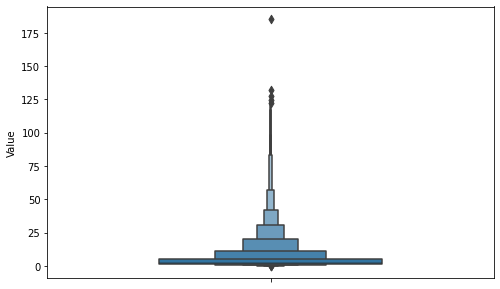

In [36]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=player_list, width=0.5)
plt.show()

/home/axe_rhitta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


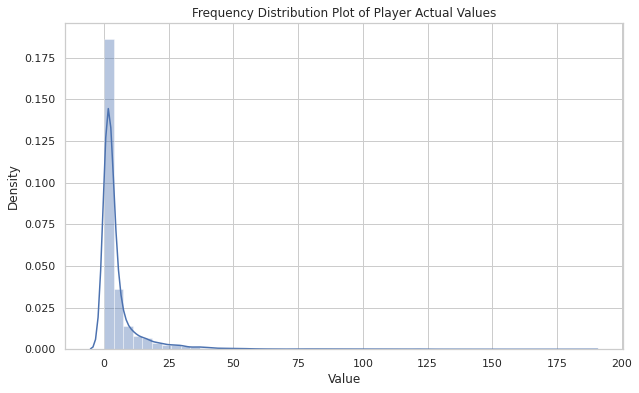

In [37]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

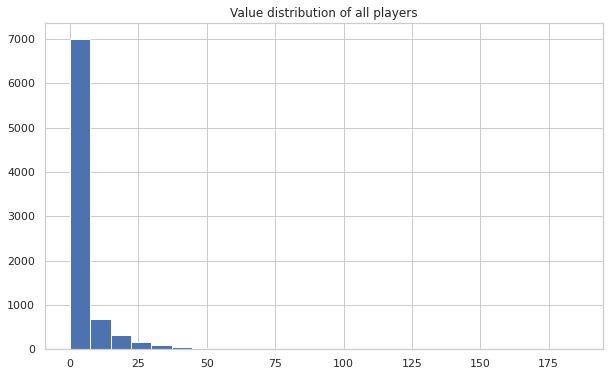

In [38]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Value distribution of all players')
plt.show()

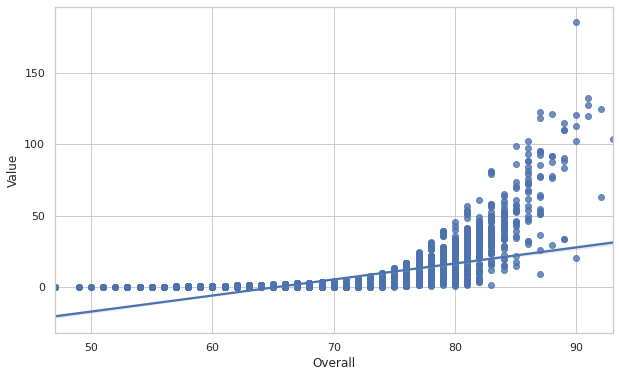

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall",y="Value",data=player_list)
plt.show()

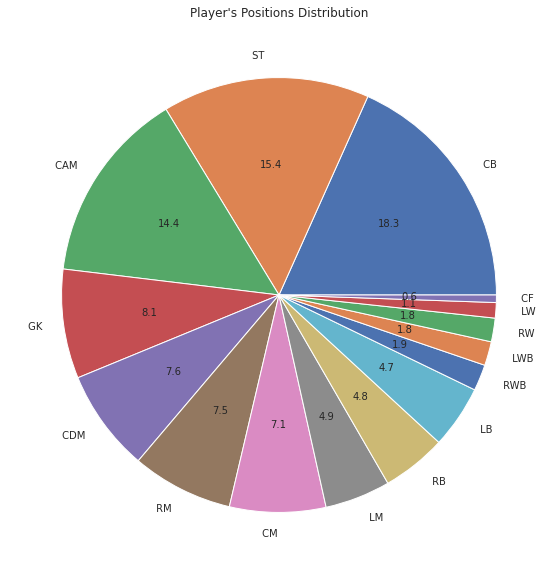

In [40]:
plt.figure(figsize=(10,10))
loc=player_list.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

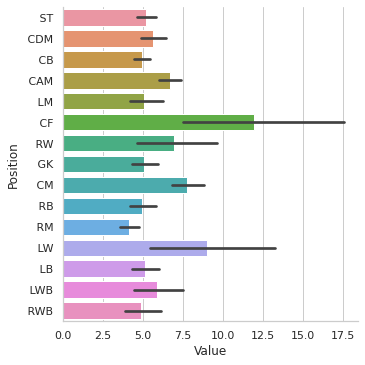

In [41]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=player_list)
plt.show()

Modelling

In [42]:
player_list = player_list[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,M. Braithwaite,7.50,29,76,76,FC Barcelona,178.0,73.0,Right,76,ST,0,0.125,15.4,362,68,78,67,74,75,368,77,71,75,65,80,386,79,80,80,75,72,380,77,81,76,75,71,321,69,31,78,70,73,76,91,35,30,26,53,14,13,11,7,8,1961,414,2,80,76,71,78,35,74
1,M. Romero,3.60,21,70,81,PSV,178.0,72.0,Right,72,ST,11,0.008,5.8,316,45,72,69,55,75,253,63,41,39,43,67,349,76,79,67,67,60,373,80,84,72,72,65,274,63,29,70,53,59,59,77,25,27,25,69,15,10,16,14,14,1711,366,1,78,72,49,65,31,71
2,N. Nández,16.00,24,77,82,Cagliari,173.0,70.0,Right,81,CDM,5,0.029,28.4,320,65,68,57,80,50,328,75,51,52,72,78,395,75,77,81,81,81,386,74,77,93,77,65,370,87,79,75,74,55,80,229,77,79,73,50,8,8,14,5,15,2078,451,1,76,67,72,77,76,83
3,J. Tanganga,6.50,21,73,83,Tottenham Hotspur,180.0,73.0,Right,75,CB,10,0.037,13.7,264,62,32,66,68,36,274,63,55,37,54,65,347,72,78,64,73,60,302,52,88,66,76,20,287,73,74,41,54,45,62,220,75,75,70,53,11,9,12,7,14,1747,381,1,75,35,60,64,73,74
4,J. Grealish,49.50,24,83,86,Aston Villa,180.0,68.0,Right,85,CAM,3,0.082,97.8,351,81,77,36,85,72,406,88,77,74,82,85,406,79,79,85,79,84,333,75,37,80,61,80,328,60,44,81,85,58,83,140,48,49,43,51,11,6,11,10,13,2015,434,1,79,76,83,86,46,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,H. Al Mansour,0.57,27,64,64,Al Ittihad,178.0,73.0,Left,64,LB,0,0.008,0.0,269,62,47,54,62,44,276,61,42,46,64,63,333,74,73,59,62,65,324,64,67,63,69,61,284,67,59,58,55,45,46,176,58,60,58,46,7,10,7,10,12,1708,373,1,73,54,59,62,58,67
8837,O. Vranješ,1.30,30,70,70,Sporting de Charleroi,183.0,76.0,Right,70,CB,0,0.011,0.0,273,53,31,73,58,58,257,52,48,48,54,55,327,64,69,67,60,67,338,68,70,69,75,56,323,89,70,58,48,58,66,209,66,71,72,58,9,11,15,8,15,1785,369,1,67,47,53,56,70,76
8838,S. Vergini,0.70,31,67,67,Atlético Tucumán,190.0,83.0,Right,67,CB,0,0.007,0.0,249,59,33,65,65,27,270,60,39,50,60,61,217,31,33,53,60,40,263,45,34,64,82,38,291,64,69,51,58,49,65,205,66,71,68,40,6,7,6,13,8,1535,329,1,32,38,60,59,68,72
8839,19 D. Dervite,0.60,29,67,67,NAC Breda,193.0,85.0,Right,66,CB,0,0.004,0.0,215,42,33,64,62,14,197,34,28,29,51,55,228,48,46,39,55,40,286,58,58,65,82,23,247,66,66,34,50,31,55,199,68,66,65,46,7,7,12,10,10,1418,314,1,47,35,51,42,66,73


In [43]:
player_list.drop(['Volleys','Curve','FK_Accuracy', 'FK_Accuracy', 'Long_Passing',
        'Movement', 'Sprint_Speed', 'Agility', 'Growth','Reactions', 'Balance', 'Goalkeeping',
        'GK_Diving','GK_Handling', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Dribbling', 
        'Vision','Standing_Tackle', 'Sliding_Tackle', 'Total_Stats','Base_Stats', 'Mentality', 
        'Heading_Accuracy', 'Penalties', 'Short_Passing','Heading_Accuracy', 
        'Aggression', 'Interceptions', 'Power','Shot_Power','Jumping','Stamina',
        'Strength','Long_Shots', 'Defending', 'Marking', 'Acceleration',],axis=1,inplace=True)

player_list

/home/axe_rhitta/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Wage,Release_Clause,Attacking,Crossing,Finishing,Skill,Ball_Control,Positioning,Composure,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,M. Braithwaite,7.50,29,76,76,FC Barcelona,178.0,73.0,Right,76,ST,0.125,15.4,362,68,78,368,80,78,76,2,80,76,71,78,35,74
1,M. Romero,3.60,21,70,81,PSV,178.0,72.0,Right,72,ST,0.008,5.8,316,45,72,253,67,70,59,1,78,72,49,65,31,71
2,N. Nández,16.00,24,77,82,Cagliari,173.0,70.0,Right,81,CDM,0.029,28.4,320,65,68,328,78,75,80,1,76,67,72,77,76,83
3,J. Tanganga,6.50,21,73,83,Tottenham Hotspur,180.0,73.0,Right,75,CB,0.037,13.7,264,62,32,274,65,41,62,1,75,35,60,64,73,74
4,J. Grealish,49.50,24,83,86,Aston Villa,180.0,68.0,Right,85,CAM,0.082,97.8,351,81,77,406,85,81,83,1,79,76,83,86,46,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,H. Al Mansour,0.57,27,64,64,Al Ittihad,178.0,73.0,Left,64,LB,0.008,0.0,269,62,47,276,63,58,46,1,73,54,59,62,58,67
8837,O. Vranješ,1.30,30,70,70,Sporting de Charleroi,183.0,76.0,Right,70,CB,0.011,0.0,273,53,31,257,55,58,66,1,67,47,53,56,70,76
8838,S. Vergini,0.70,31,67,67,Atlético Tucumán,190.0,83.0,Right,67,CB,0.007,0.0,249,59,33,270,61,51,65,1,32,38,60,59,68,72
8839,19 D. Dervite,0.60,29,67,67,NAC Breda,193.0,85.0,Right,66,CB,0.004,0.0,215,42,33,197,55,34,55,1,47,35,51,42,66,73


In [44]:
#View the correlations
corr_mat = player_list.corr()
corr_mat

,Value,Age,Overall,Potential,Height,Weight,Best_Overall,Wage,Release_Clause,Attacking,Crossing,Finishing,Skill,Ball_Control,Positioning,Composure,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.053978,0.642495,0.582892,0.000421,0.034808,0.656895,0.774808,0.974431,0.257554,0.216373,0.207228,0.266078,0.269965,0.216815,0.427317,0.435406,0.199770,0.291082,0.428125,0.424015,0.151278,0.239922
Age,0.053978,1.000000,0.484999,-0.337033,0.108917,0.264541,0.405750,0.234579,0.047225,0.147995,0.112955,0.067019,0.124297,0.056577,0.076419,0.401211,0.472712,-0.238020,0.287487,0.375986,0.192592,0.206329,0.394196
Overall,0.642495,0.484999,1.000000,0.534244,0.041792,0.150728,0.984607,0.648597,0.607342,0.356440,0.309001,0.238875,0.363350,0.352801,0.271525,0.673737,0.501537,0.147605,0.437590,0.669934,0.599179,0.314772,0.502518
Potential,0.582892,-0.337033,0.534244,1.000000,-0.027211,-0.070442,0.584051,0.451990,0.560865,0.150774,0.127253,0.110411,0.184007,0.228544,0.123479,0.295090,0.220667,0.247794,0.167622,0.323232,0.388708,0.122079,0.095664
Height,0.000421,0.108917,0.041792,-0.027211,1.000000,0.760258,0.032583,0.027338,-0.000625,-0.368946,-0.517968,-0.383694,-0.478886,-0.427345,-0.446671,-0.165474,0.036755,-0.381723,-0.126170,-0.227278,-0.344537,0.109629,0.472265
Weight,0.034808,0.264541,0.150728,-0.070442,0.760258,1.000000,0.130067,0.078910,0.028792,-0.267707,-0.413042,-0.290553,-0.377300,-0.342982,-0.343699,-0.055956,0.123032,-0.332011,-0.024846,-0.129000,-0.243625,0.109755,0.560135
Best_Overall,0.656895,0.405750,0.984607,0.584051,0.032583,0.130067,1.000000,0.645305,0.621489,0.389478,0.318832,0.272726,0.395517,0.395547,0.300131,0.691269,0.470351,0.161475,0.426981,0.656450,0.594105,0.316317,0.492297
Wage,0.774808,0.234579,0.648597,0.451990,0.027338,0.078910,0.645305,1.000000,0.740257,0.275565,0.233425,0.194158,0.278593,0.276870,0.214422,0.459076,0.547089,0.103724,0.283236,0.437060,0.394592,0.191493,0.264091
Release_Clause,0.974431,0.047225,0.607342,0.560865,-0.000625,0.028792,0.621489,0.740257,1.000000,0.237537,0.201441,0.190213,0.247295,0.249700,0.198678,0.398976,0.405284,0.188458,0.271041,0.405698,0.396796,0.145843,0.225955
Attacking,0.257554,0.147995,0.356440,0.150774,-0.368946,-0.267707,0.389478,0.275565,0.237537,1.000000,0.842322,0.880145,0.923983,0.933923,0.915010,0.696775,0.227645,0.112906,0.338187,0.346864,0.329995,0.069424,0.020704


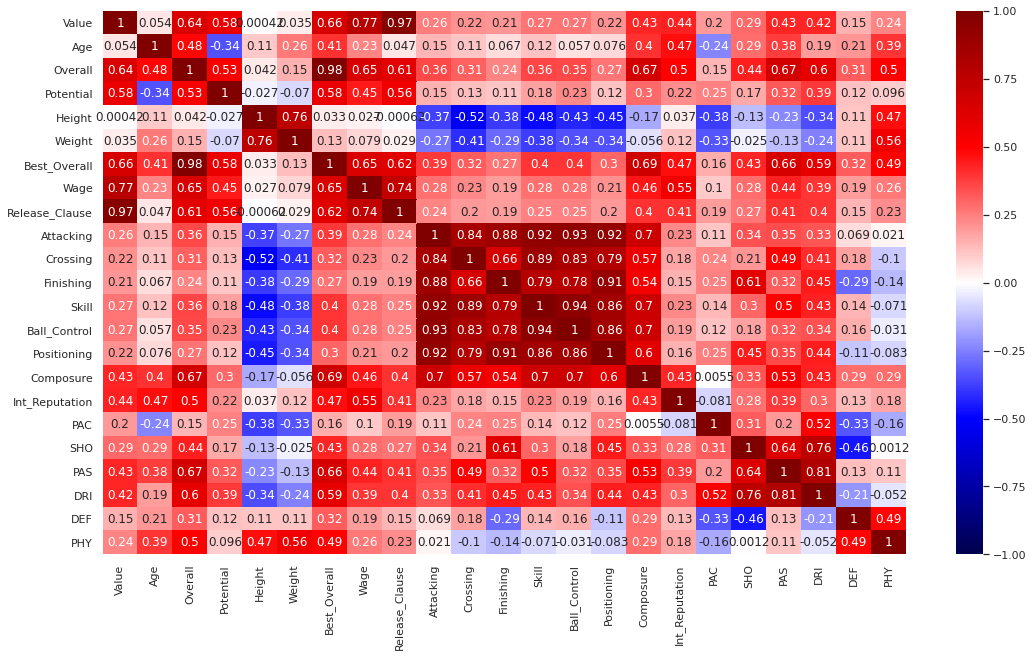

In [45]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 10))
sns.set(style="whitegrid")
sns.heatmap(corr_mat, cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

In [46]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.974431
Wage,0.774808
Best_Overall,0.656895
Overall,0.642495
Potential,0.582892
Int_Reputation,0.435406
PAS,0.428125
Composure,0.427317
DRI,0.424015


In [47]:
#Correlation With Value (modes correlated with negative)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(7)

,Value
Height,0.000421
Weight,0.034808
Age,0.053978
DEF,0.151278
PAC,0.199770
Finishing,0.207228
Crossing,0.216373


In [48]:
# Slicing data into feature and target
Xb= player_list.drop(columns=["Value","Name","Team","Foot","Position", "Age"])
yb= player_list.loc[:,"Value"]

In [49]:
# fit model with target as player market value 
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.176e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:59:00   Log-Likelihood:                         -18718.
No. Observations:                8480   AIC:                                  3.748e+04
Df Residuals:                    8459   BIC:                                  3.763e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [50]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(Xb,yb)
coeff_df = pd.DataFrame(regressor.coef_, Xb.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Release_Clause,Int_Reputation,Best_Overall,Potential,DRI,Finishing,PAC,Height,Weight,Positioning,DEF,Skill,PHY,Composure,Attacking,Crossing,Ball_Control,PAS,SHO,Overall
Coefficient,37.289894,0.443621,0.300792,0.082566,0.063579,0.018855,0.013716,0.013601,0.009099,0.007577,0.004113,0.001591,0.000701,-0.000304,-0.000391,-0.001382,-0.003498,-0.00637,-0.007413,-0.01257,-0.01777


In [51]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(Xb)
df = pd.DataFrame({'Name':player_list.Name,'Actual': yb, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
L. Messi,103.5,119.56,-16.06
Sergio Ramos,33.5,45.11,-11.61
O. Dembélé,57.5,67.21,-9.71
L. Modrić,36.5,46.00,-9.50
K. Benzema,83.5,92.70,-9.20
Piqué,32.5,40.80,-8.30
19 Malcom,31.0,39.23,-8.23
T. Courtois,88.0,96.11,-8.11
Pedri,24.0,31.52,-7.52


In [52]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(Xb)
df = pd.DataFrame({'Name':player_list.Name,'Actual': yb, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_over

,Actual,Predicted,Difference
Name,,,
M. Politano,28.0,5.87,22.13
L. Torreira,27.5,4.47,23.03
Y. Herrera,28.5,5.28,23.22
M. Perin,28.0,4.74,23.26
F. Chiesa,28.0,4.10,23.90
A. Areola,30.0,5.11,24.89
M. Kean,31.0,4.70,26.30
Pedro Porro,36.5,4.68,31.82
Morata,39.5,5.79,33.71


In [53]:
#Calculating MAE, MSE, RMSE and R^2 values of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(yb, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yb, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yb, y_pred)))
print('Linear Regression R^2:',regressor.score(Xb,yb))

Mean Absolute Error: 1.0818704738190976
Mean Squared Error: 4.7581239888043845
Root Mean Squared Error: 2.181312446396523
Linear Regression R^2: 0.9586102961079165


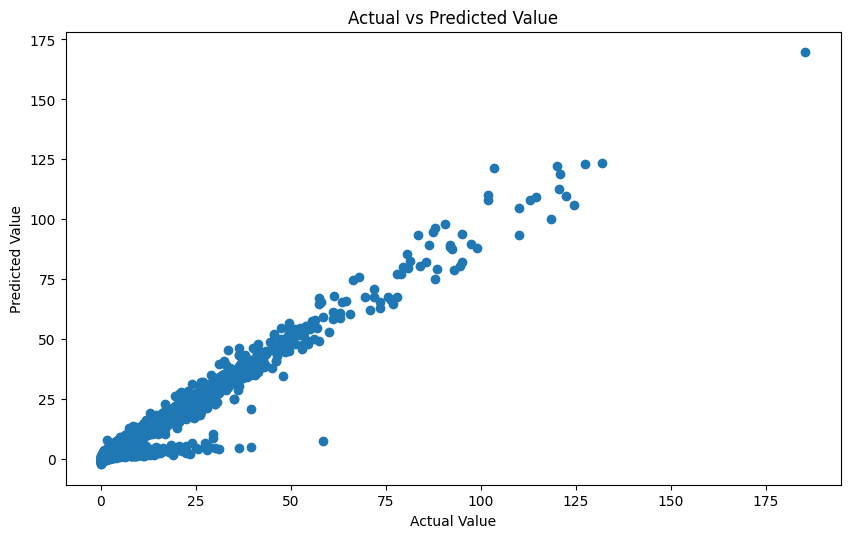

In [54]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(yb, resultsb.predict(Xb))
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [55]:
#Model based on most selected columns

X1= player_list.loc[:,['Overall','Age','Int_Reputation', 'Release_Clause']]
y1= player_list.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          5.479e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:59:01   Log-Likelihood:                         -19214.
No. Observations:                8480   AIC:                                  3.844e+04
Df Residuals:                    8476   BIC:                                  3.846e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [56]:
#Correlation matrics of selected features
player_list_selected_features= player_list[['Overall','Age','Int_Reputation', 'Release_Clause','Height','Weight']]

player_list_selected_features.corr()

,Overall,Age,Int_Reputation,Release_Clause,Height,Weight
Overall,1.000000,0.484999,0.501537,0.607342,0.041792,0.150728
Age,0.484999,1.000000,0.472712,0.047225,0.108917,0.264541
Int_Reputation,0.501537,0.472712,1.000000,0.405284,0.036755,0.123032
Release_Clause,0.607342,0.047225,0.405284,1.000000,-0.000625,0.028792
Height,0.041792,0.108917,0.036755,-0.000625,1.000000,0.760258
Weight,0.150728,0.264541,0.123032,0.028792,0.760258,1.000000


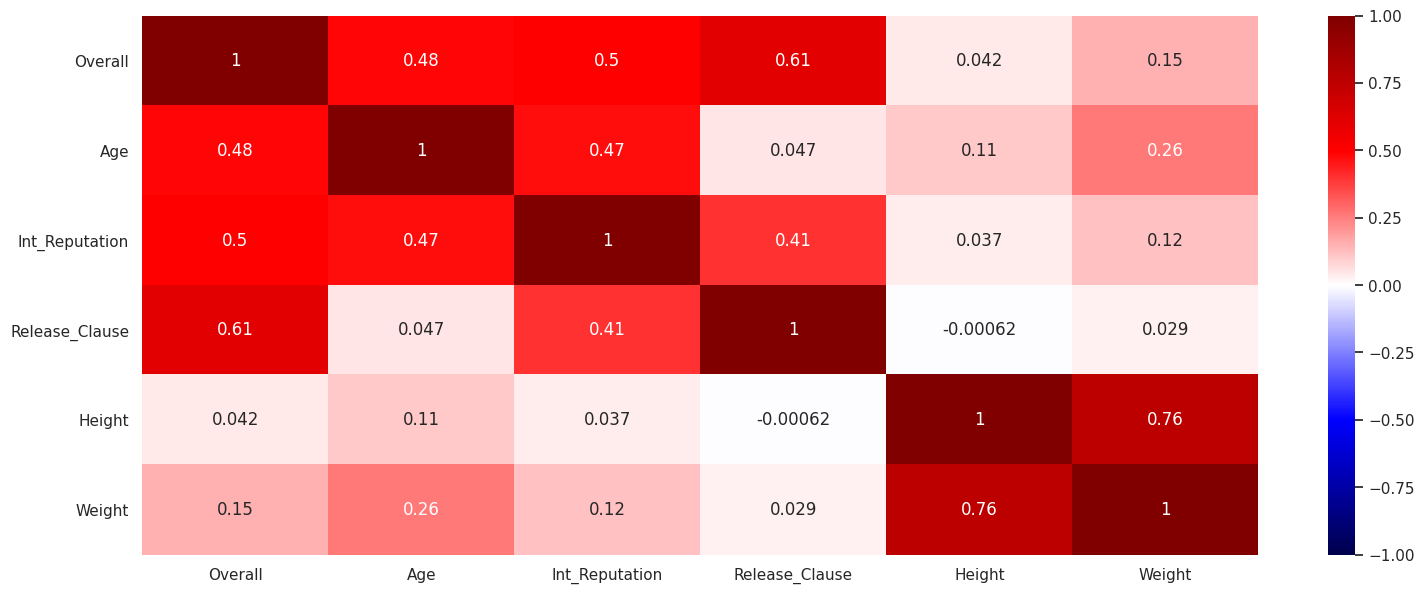

In [57]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(player_list_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 1800x700 with 0 Axes>

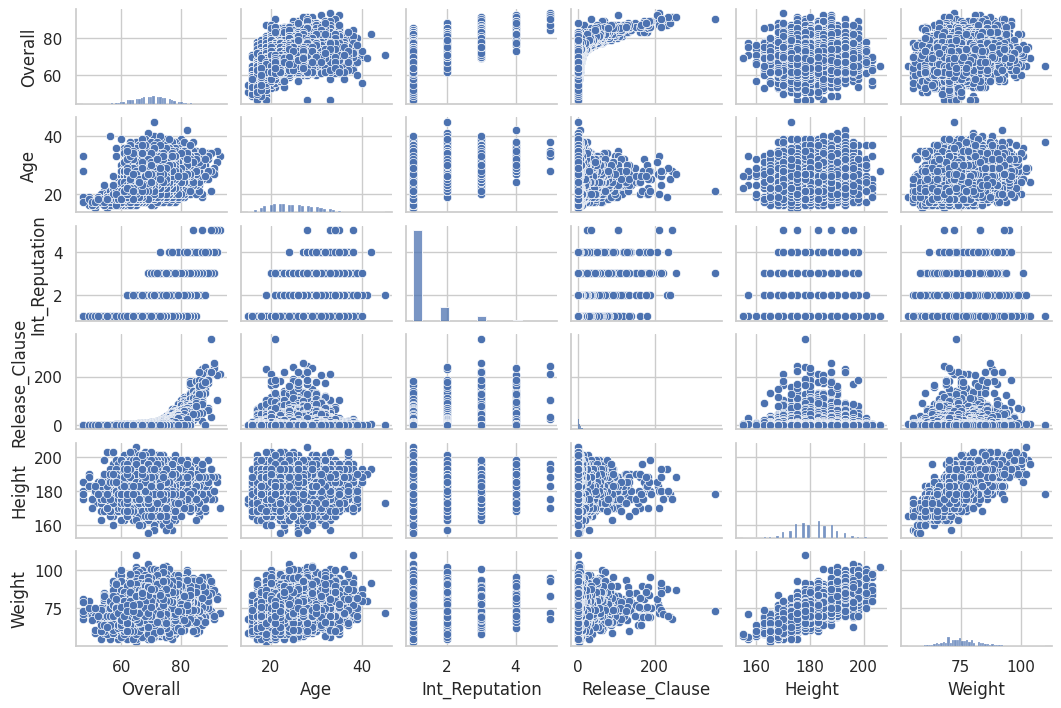

In [58]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(player_list_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [59]:
#Splitting data into train, test and validation (%60 - %20)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.9644446129009611
5.059710275239849
[ 0.19532923 -0.1478579   0.98489601  0.45687189]


In [60]:
coeff = pd.DataFrame(X_train.columns)

coeff['CoefficientEstimate'] = lr.coef_

coeff.sort_values("CoefficientEstimate")

,0,CoefficientEstimate
1,Age,-0.147858
0,Overall,0.195329
3,Release_Clause,0.456872
2,Int_Reputation,0.984896


In [61]:
#setting up the 4 models we're choosing from:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)
lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()
lm.fit(X_train, y_train)

print(f'Linear Regression for all data R^2: {lm.score(X1, y1):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'Polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression for all data R^2: 0.956
Linear Regression for test data R^2: 0.964
Linear Regression for validation data R^2: 0.966

Ridge Regression for test data R^2: 0.960
Ridge Regression for validation data R^2: 0.961

Lasso Regression for test data R^2: 0.799581
Lasso Regression for validation data R^2: 0.798611

Polynomial regression for test data R^2: 0.982
Polynomial regression for validation data R^2: 0.983


In [62]:
model= sm.OLS(y1, X1, data=player_list_selected_features)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          5.479e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:59:11   Log-Likelihood:                         -19214.
No. Observations:                8480   AIC:                                  3.844e+04
Df Residuals:                    8476   BIC:                                  3.846e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [63]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X1,y1)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Int_Reputation,Release_Clause,Overall,Age
Coefficient,0.972485,0.463483,0.184463,-0.140891


In [64]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y1, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
Pedri,24.0,32.97,-8.97
O. Dembélé,57.5,65.40,-7.90
João Félix,80.5,87.83,-7.33
Ansu Fati,17.0,24.12,-7.12
V. Tsygankov,34.0,40.88,-6.88
J. Koundé,44.5,51.03,-6.53
Vinícius Jr.,45.5,51.92,-6.42
19 Malcom,31.0,37.41,-6.41
F. Valverde,58.0,64.24,-6.24


In [65]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y1, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_over

,Actual,Predicted,Difference
Name,,,
G. Bale,29.5,5.22,24.28
M. Perin,28.0,3.70,24.30
M. Politano,28.0,3.66,24.34
L. Jović,27.5,2.88,24.62
Y. Herrera,28.5,2.69,25.81
A. Areola,30.0,3.70,26.30
M. Kean,31.0,2.98,28.02
Pedro Porro,36.5,3.16,33.34
Morata,39.5,4.86,34.64


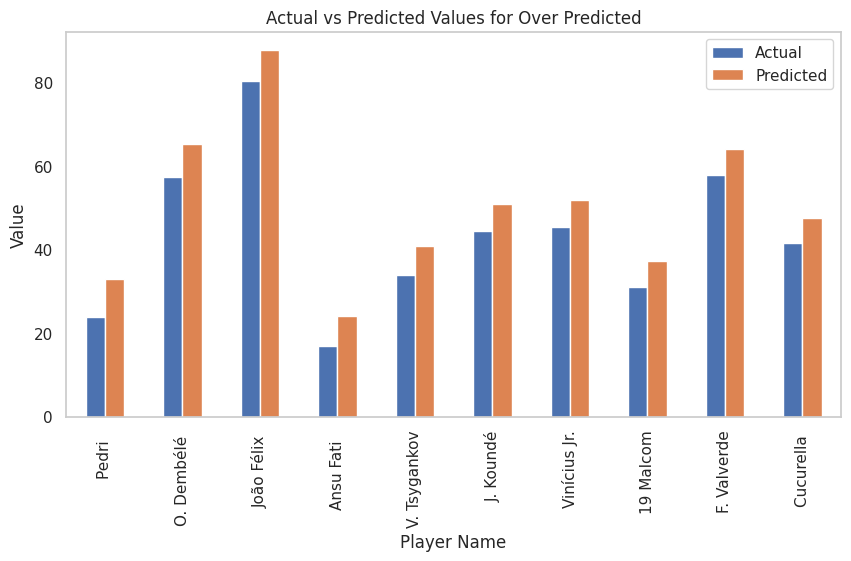

In [66]:
#Plot the comparision of Actual and Predicted Values for Over Predicted
df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

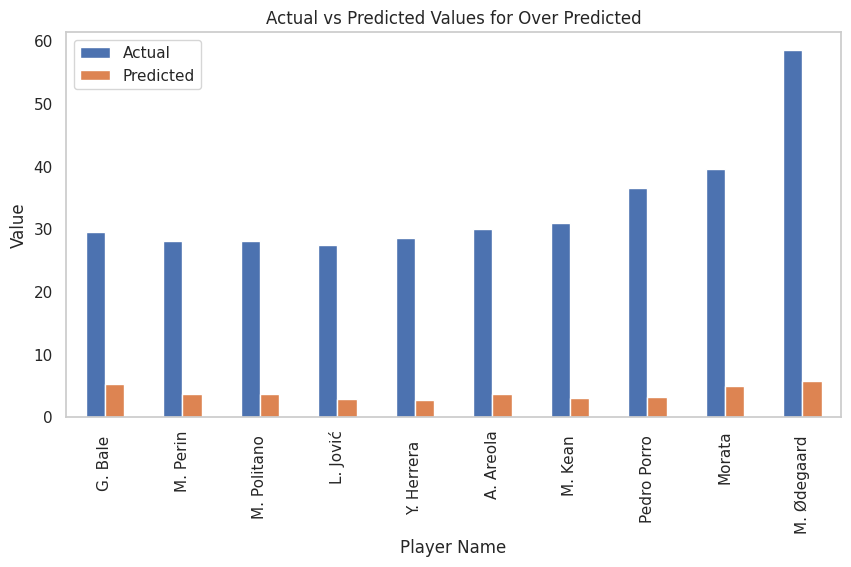

In [67]:
#Plot the comparision of Actual and Predicted Values for Over Predicted
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [69]:
# Run Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state = 16)
cross_val_score(lm, X1, y1, cv=kf, scoring='r2')

print('Linear Regression:',round(np.mean(cross_val_score(lm, X1, y1, cv=kf, scoring='r2')),5))
print('Ridge Regression:',round(np.mean(cross_val_score(lm_reg, X1, y1, cv=kf, scoring='r2')),5))
print('Lasso Regression:',round(np.mean(cross_val_score(lm_lasso, X1, y1, cv=kf, scoring='r2')),5))
print('Poly. Regression:',round(np.mean(cross_val_score(lm_poly, X1, y1, cv=kf, scoring='r2')),5))

Linear Regression: 0.95146
Ridge Regression: 0.94977
Lasso Regression: 0.77971
Poly. Regression: 0.95146


In [70]:
# Run Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state = 16)
cross_val_score(lm, X_test, y_test, cv=kf, scoring='r2')

print('Linear Regression:',round(np.mean(cross_val_score(lm, X_test, y_test, cv=kf, scoring='r2')),5))
print('Ridge Regression:',round(np.mean(cross_val_score(lm_reg, X_test, y_test, cv=kf, scoring='r2')),5))
print('Lasso Regression:',round(np.mean(cross_val_score(lm_lasso, X_test, y_test, cv=kf, scoring='r2')),5))
print('Poly. Regression:',round(np.mean(cross_val_score(lm_poly, X_test, y_test, cv=kf, scoring='r2')),5))

Linear Regression: 0.96044
Ridge Regression: 0.95948
Lasso Regression: 0.93173
Poly. Regression: 0.96044


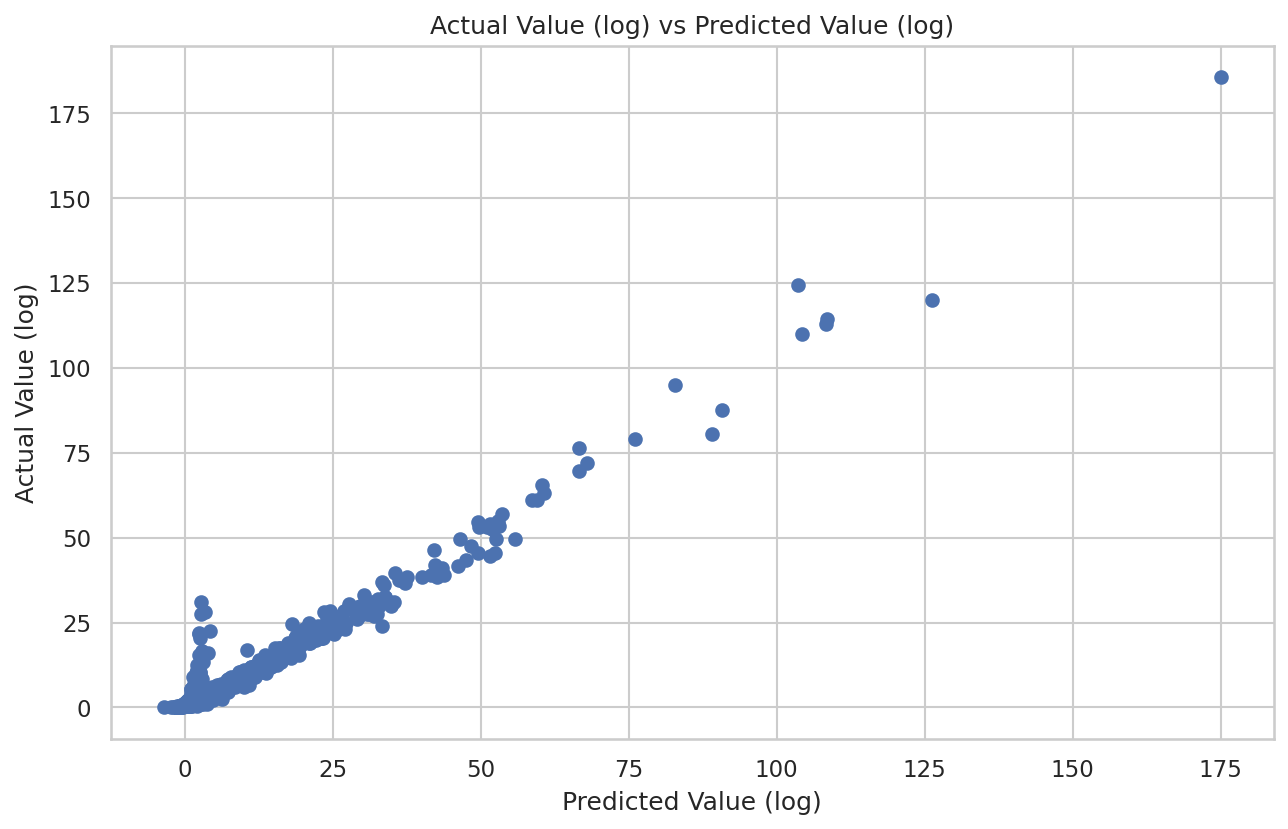

In [71]:
# Regression Fit with Log
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(X_test,y_test);
pred = lr.predict(X_test)
plt.scatter(pred,y_test)
plt.title("Actual Value (log) vs Predicted Value (log)")
plt.xlabel("Predicted Value (log)")
plt.ylabel("Actual Value (log)")
plt.show()

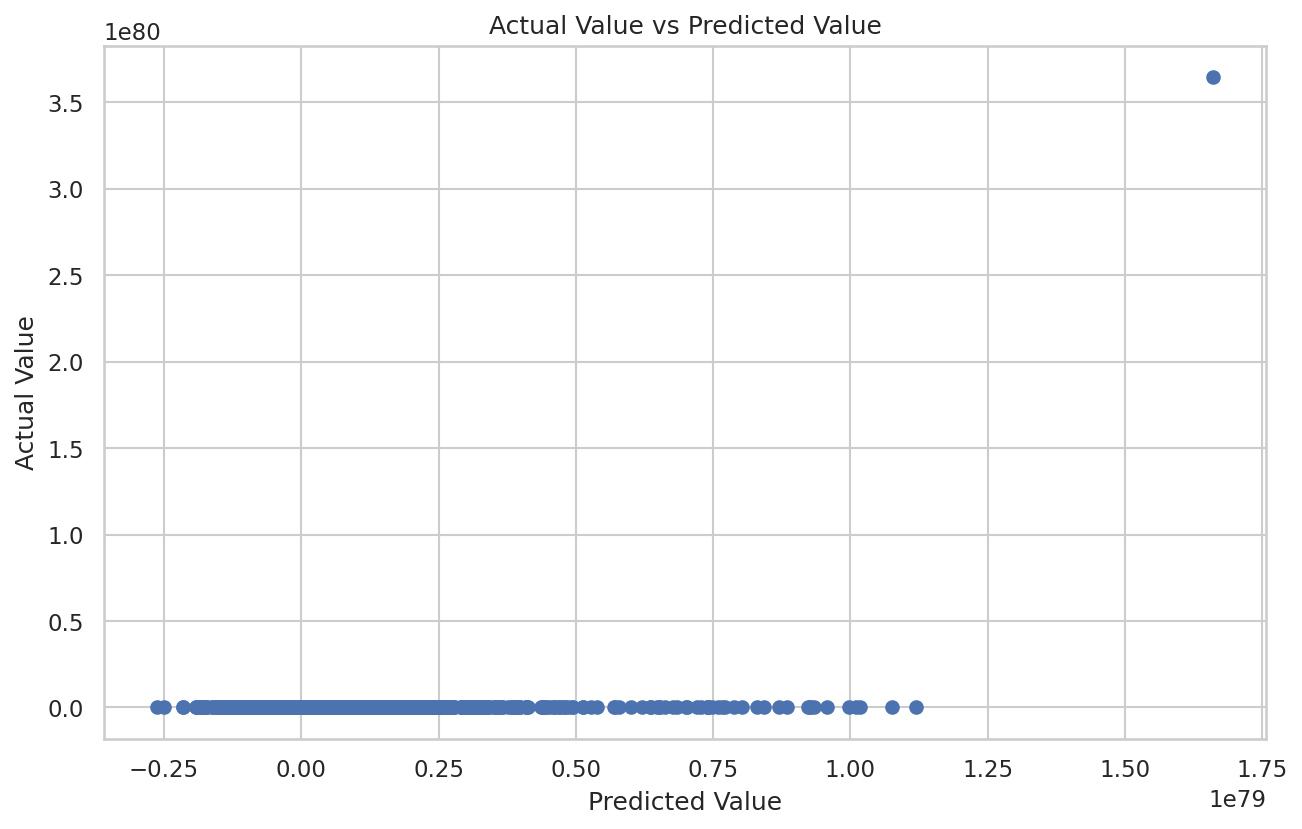

In [72]:
# Regression Fit with Log
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(X1,np.exp(y1));
pred = lr.predict(X1)
plt.scatter(pred,np.exp(y1))
plt.title("Actual Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()